In [29]:
import pandas as pd
import re
from unidecode import unidecode
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df_negociaciones = pd.read_excel('../Hackathon Sistecredito/Datasets/negociaciones_compromiso_pago.xlsx')
df_negociaciones

,ID,Conversación
0,1,"Agente: Buen día, soy Laura de Sistecredito. ¿..."
1,2,"Agente: Buenas tardes, habla Andrés de Sistecr..."
2,3,"Agente: Hola, soy Carolina de Sistecredito. ¿D..."
3,4,"Agente: Muy buenos días, habla Luisa de Sistec..."
4,5,"Agente: Buenas tardes, soy Roberto de Sistecre..."
5,6,"Agente: Hola, soy Marta de Sistecredito. ¿Dese..."
6,7,"Agente: Buen día, soy Pablo de Sistecredito. ¿..."
7,8,"Agente: Hola, soy Diana de Sistecredito. ¿Dese..."
8,9,"Agente: Buenas tardes, soy Estefanía de Sistec..."
9,10,"Agente: Muy buenos días, habla Sergio de Siste..."


In [31]:
# Eliminar columna id
df_negociaciones = df_negociaciones.drop(columns=['ID'])
df_negociaciones

,Conversación
0,"Agente: Buen día, soy Laura de Sistecredito. ¿..."
1,"Agente: Buenas tardes, habla Andrés de Sistecr..."
2,"Agente: Hola, soy Carolina de Sistecredito. ¿D..."
3,"Agente: Muy buenos días, habla Luisa de Sistec..."
4,"Agente: Buenas tardes, soy Roberto de Sistecre..."
5,"Agente: Hola, soy Marta de Sistecredito. ¿Dese..."
6,"Agente: Buen día, soy Pablo de Sistecredito. ¿..."
7,"Agente: Hola, soy Diana de Sistecredito. ¿Dese..."
8,"Agente: Buenas tardes, soy Estefanía de Sistec..."
9,"Agente: Muy buenos días, habla Sergio de Siste..."


In [32]:
df_chatbot = pd.DataFrame()

In [33]:
import pandas as pd
from unidecode import unidecode  # Librería para eliminar tildes

# Función para limpiar texto: eliminar tildes y convertir a minúsculas
def limpiar_texto(texto):
    return unidecode(texto).lower()

# Función para separar mensajes manteniendo el formato deseado
def estructurar_mensajes(conversacion):
    agente_msgs = []
    cliente_msgs = []
    
    lineas = conversacion.split("\n")
    prev_speaker = None
    
    for linea in lineas:
        if linea.startswith("Agente:"):
            mensaje = limpiar_texto(linea.replace("Agente:", "").strip())
            if prev_speaker == "Agente":
                # Si el mensaje anterior también era de un agente, insertar None en la respuesta del cliente
                cliente_msgs.append(None)
            agente_msgs.append(mensaje)
            prev_speaker = "Agente"
        elif linea.startswith("Cliente:"):
            mensaje = limpiar_texto(linea.replace("Cliente:", "").strip())
            cliente_msgs.append(mensaje)
            prev_speaker = "Cliente"

    # Asegurar que ambas listas tengan el mismo tamaño
    while len(agente_msgs) > len(cliente_msgs):
        cliente_msgs.append(None)
    
    return pd.DataFrame({"Mensajes Agente": agente_msgs, "Mensajes Cliente": cliente_msgs})

# Aplicar la función a cada conversación
df_chatbot = pd.concat(df_negociaciones["Conversación"].apply(estructurar_mensajes).to_list(), ignore_index=True)

df_chatbot

,Mensajes Agente,Mensajes Cliente
0,"buen dia, soy laura de sistecredito. ?deseas r...","si, me interesa conocer mis opciones."
1,veo que tu credito es de $1.200.000 y tienes 1...,"si, me parece adecuado."
2,"perfecto, entonces te comprometes a pagar 3 cu...",None
3,la primera cuota se realizara el 05/06/2024.,"confirmo, muchas gracias."
4,!excelente! estamos aqui para apoyarte en lo q...,"gracias, quedo conforme."
...,...,...
294,"entonces, te comprometes a pagar 4 cuotas mens...",None
295,la primera cuota se realizara el 24/07/2024.,"muchas gracias por las alternativas, eso me co..."
296,"si en algun momento necesitas revisar el plan,...","lo tendre en cuenta, confirmo mi compromiso."
297,"excelente, quedamos en 4 cuotas mensuales de $...","agradezco la atencion y la amabilidad, muchas ..."


In [34]:
# Convertir a CSV
df_chatbot.to_csv("../Hackathon Sistecredito/Datasets/negociaciones_chatbot.csv", index=False)

In [44]:
# Crear la columna Instruction con la misma instrucción para todas las filas
df_chatbot["Instruction"] = "Responde al mensaje del cliente con un tono cordial y siguiendo la política de negociación."

# Renombrar columnas para que coincidan con el formato Instruction, Input, Output
df_formateado = df_chatbot.rename(columns={"Mensajes Cliente": "Input", "Mensajes Agente": "Output"})[["Instruction", "Input", "Output"]]

df_formateado

,Instruction,Input,Output
0,Responde al mensaje del cliente con un tono co...,"si, me interesa conocer mis opciones.","buen dia, soy laura de sistecredito. ?deseas r..."
1,Responde al mensaje del cliente con un tono co...,"si, me parece adecuado.",veo que tu credito es de $1.200.000 y tienes 1...
2,Responde al mensaje del cliente con un tono co...,None,"perfecto, entonces te comprometes a pagar 3 cu..."
3,Responde al mensaje del cliente con un tono co...,"confirmo, muchas gracias.",la primera cuota se realizara el 05/06/2024.
4,Responde al mensaje del cliente con un tono co...,"gracias, quedo conforme.",!excelente! estamos aqui para apoyarte en lo q...
...,...,...,...
294,Responde al mensaje del cliente con un tono co...,None,"entonces, te comprometes a pagar 4 cuotas mens..."
295,Responde al mensaje del cliente con un tono co...,"muchas gracias por las alternativas, eso me co...",la primera cuota se realizara el 24/07/2024.
296,Responde al mensaje del cliente con un tono co...,"lo tendre en cuenta, confirmo mi compromiso.","si en algun momento necesitas revisar el plan,..."
297,Responde al mensaje del cliente con un tono co...,"agradezco la atencion y la amabilidad, muchas ...","excelente, quedamos en 4 cuotas mensuales de $..."


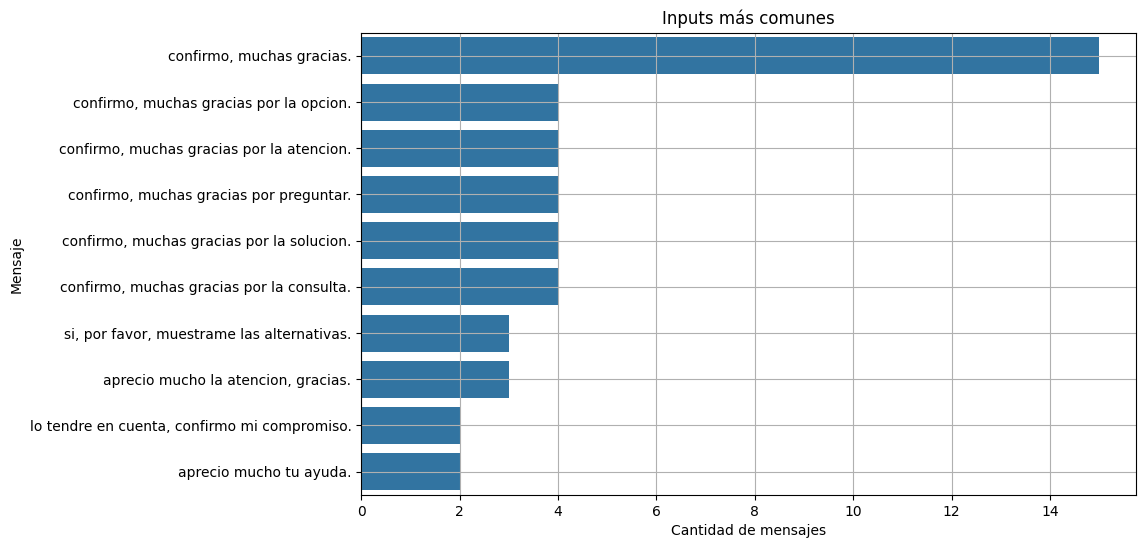

In [59]:
# Gráfico de inputs más comunes
plt.figure(figsize=(10, 6))
sns.countplot(y=df_formateado["Input"], order=df_formateado["Input"].value_counts().index[:10])
plt.title("Inputs más comunes")
plt.xlabel("Cantidad de mensajes")
plt.ylabel("Mensaje")
plt.grid()
plt.show()

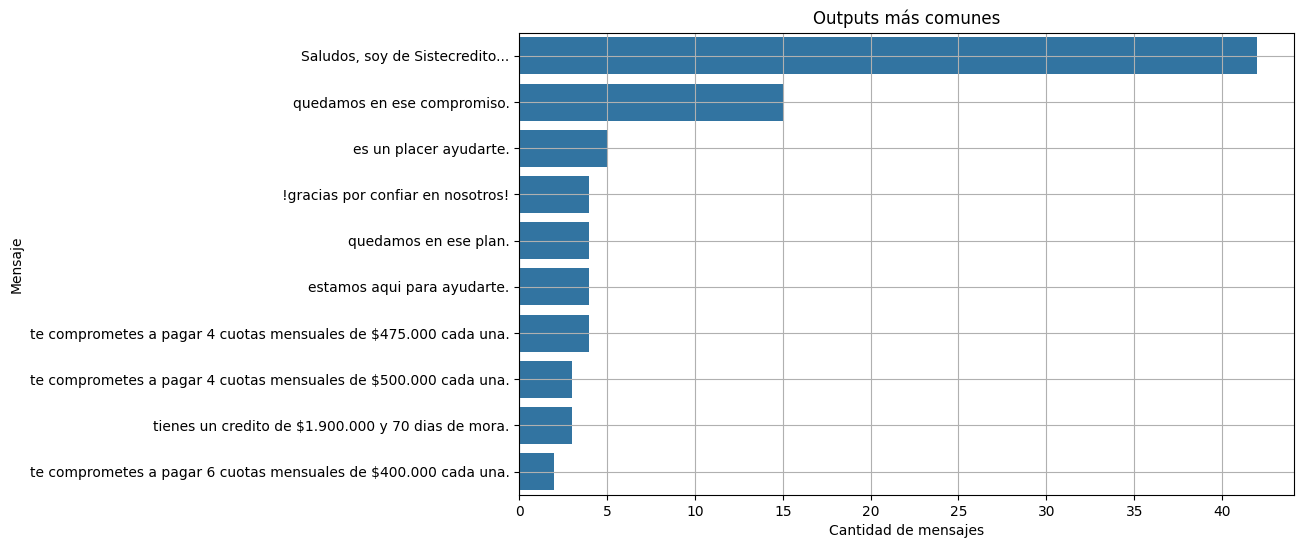

In [58]:
# Gráfico de outputs más comunes
plt.figure(figsize=(10, 6))
sns.countplot(y=df_formateado["Output"], order=df_formateado["Output"].value_counts().index[:10])
plt.title("Outputs más comunes")
plt.xlabel("Cantidad de mensajes")
plt.ylabel("Mensaje")
plt.grid()
plt.show()

In [56]:
df_formateado.loc[df_formateado["Output"].str.startswith("soy de sistecredito"), "Output"] = "Saludos, soy de Sistecredito..."

df_formateado

,Instruction,Input,Output
0,Responde al mensaje del cliente con un tono co...,"si, me interesa conocer mis opciones.","Saludos, soy de Sistecredito..."
1,Responde al mensaje del cliente con un tono co...,"si, me parece adecuado.",veo que tu credito es de $1.200.000 y tienes 1...
2,Responde al mensaje del cliente con un tono co...,None,entonces te comprometes a pagar 3 cuotas mensu...
3,Responde al mensaje del cliente con un tono co...,"confirmo, muchas gracias.",la primera cuota se realizara el 05/06/2024.
4,Responde al mensaje del cliente con un tono co...,"gracias, quedo conforme.",!excelente! estamos aqui para apoyarte en lo q...
...,...,...,...
294,Responde al mensaje del cliente con un tono co...,None,te comprometes a pagar 4 cuotas mensuales de $...
295,Responde al mensaje del cliente con un tono co...,"muchas gracias por las alternativas, eso me co...",la primera cuota se realizara el 24/07/2024.
296,Responde al mensaje del cliente con un tono co...,"lo tendre en cuenta, confirmo mi compromiso.",estamos aqui para ayudarte.
297,Responde al mensaje del cliente con un tono co...,"agradezco la atencion y la amabilidad, muchas ...",quedamos en 4 cuotas mensuales de $450.000 cad...
